In [59]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
births = pd.read_csv('../data/02-birth-rate-germany-yearly-1950.csv', sep=';')
births.columns = ['year', 'birth_rate', 'annual_change']
births.year = pd.to_datetime(births.year)
births = births.set_index(births.year).loc[:'2021'].drop('year', axis=1)

births.head()

,birth_rate,annual_change
year,,
1950-12-31,15.130,NaN
1951-12-31,15.314,1.22
1952-12-31,15.497,1.19
1953-12-31,15.681,1.19
1954-12-31,15.865,1.17


<AxesSubplot:xlabel='year'>

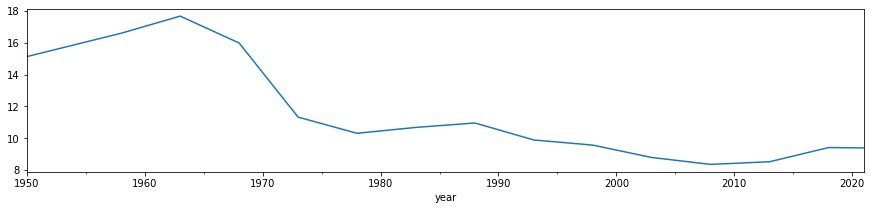

In [6]:
plt.figure(figsize=(15,3))
births.birth_rate.plot()

/Users/nastja/.pyenv/versions/py39/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


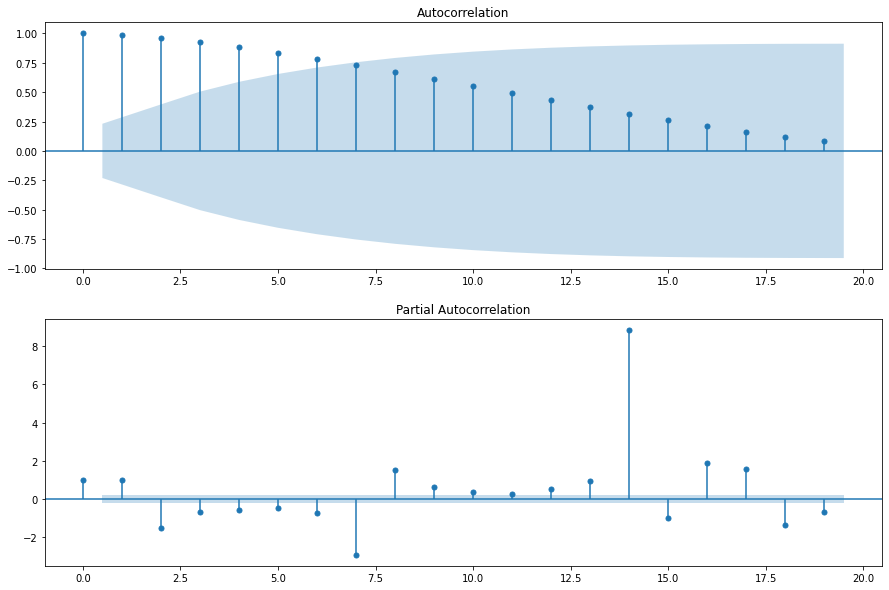

In [7]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
fig = plot_acf(births.birth_rate, ax=ax[0])
fig = plot_pacf(births.birth_rate, ax=ax[1])

## Australia

In [20]:
births_au = pd.read_csv('../data/02-birth-rate-australia-monthly-1975.csv', sep=',')[['MONTH_OCCURENCE', 'TIME', 'Value', 'Region']]
births_au.columns = ['month', 'year', 'births', 'region']
births_au['yearmonth'] = births_au.apply(lambda row: str(row.year) + '-' + str(row.month), axis=1)

In [31]:
VALID_MONTHS = [str(i) for i in range(1,13)]

In [46]:
births_au = pd.read_csv('../data/02-birth-rate-australia-monthly-1975.csv', sep=',')[['MONTH_OCCURENCE', 'TIME', 'Value', 'Region']]
births_au.columns = ['month', 'year', 'births', 'region']
births_au = births_au[births_au.month.astype(str).isin(VALID_MONTHS)]
births_au['yearmonth'] = births_au.apply(lambda row: str(row.year) + '-' + str(row.month), axis=1)
births_au.yearmonth = pd.to_datetime(births_au.yearmonth)

totals = births_au.groupby('yearmonth').sum().births.iloc[:-2]#.reset_index()
totals.head()

yearmonth
1975-01-01    40038
1975-02-01    37317
1975-03-01    40335
1975-04-01    38178
1975-05-01    40914
Name: births, dtype: int64

<AxesSubplot:xlabel='yearmonth'>

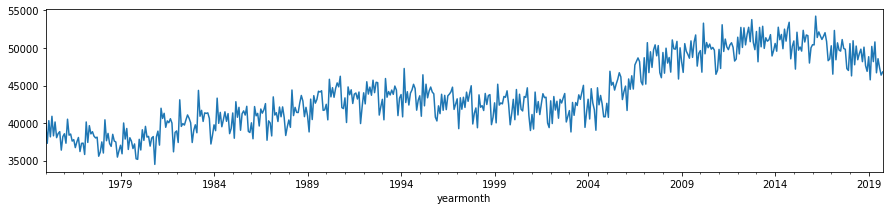

In [47]:
plt.figure(figsize=(15,3))
totals.plot()

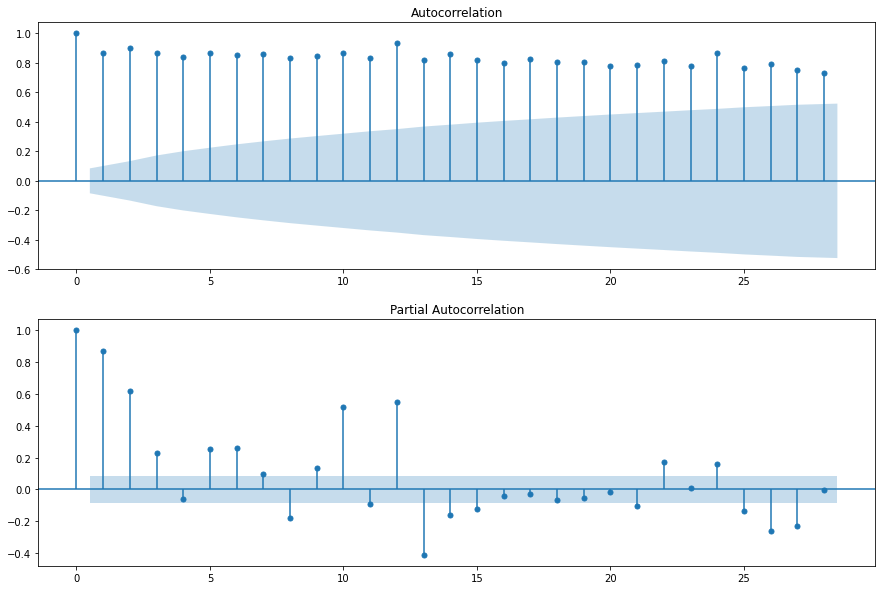

In [48]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
fig = plot_acf(totals, ax=ax[0])
fig = plot_pacf(totals, ax=ax[1])

## Tests

Stationarity etc.
Analysis Time Series

<AxesSubplot:>

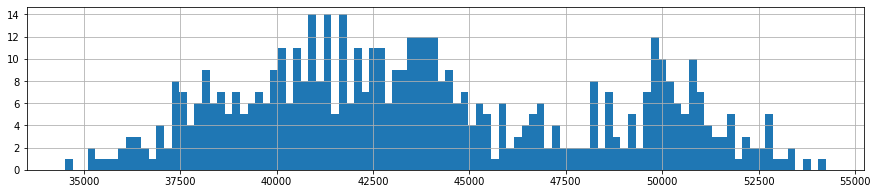

In [53]:
plt.figure(figsize=(15,3))
totals.hist(bins=100)

In [57]:
X = totals.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=40843.472119, mean2=46846.944238
variance1=7211187.052197, variance2=15511443.889084


<AxesSubplot:>

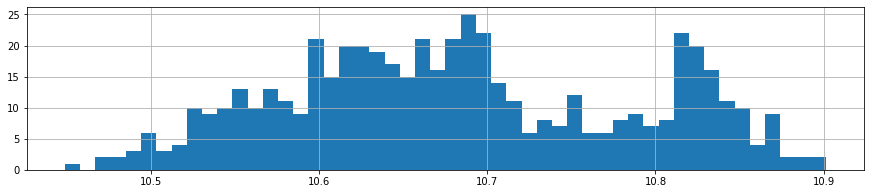

In [65]:
plt.figure(figsize=(15,3))
np.log(totals).hist(bins=50)

<AxesSubplot:xlabel='yearmonth'>

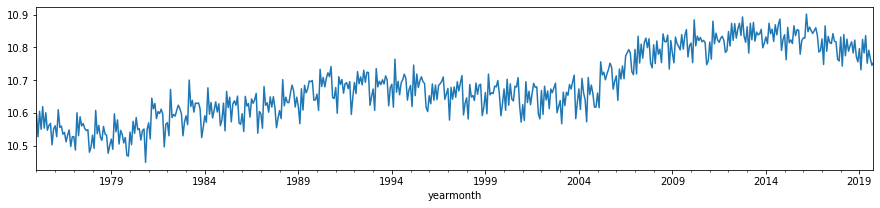

In [66]:
plt.figure(figsize=(15,3))
np.log(totals).plot()

In [67]:
X = np.log(totals)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=10.615328, mean2=10.751033
variance1=0.004380, variance2=0.007322


## Forecast

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan==2.14

     |████████████████████████████████| 18.4 MB 11.5 MB/s eta 0:00:012

In [ ]:
import fbprophet

In [34]:
!python --version

Python 3.9.5


In [ ]:
df = births.copy().reset_index().drop('annual_change', axis=1)
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

# define the period for which we want a prediction
future = list()
for year in range(2022, 2050):
	date = f'{year}-12-31'
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
pyplot.show()